In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Text processing
import re
from collections import Counter

# Machine Learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

# Settings
import warnings
warnings.filterwarnings('ignore')

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("✅ Đã import thành công!")

✅ Đã import thành công!


In [2]:
# Load cleaned dataset
df = pd.read_csv('../data/cleaned_dataset.csv')

print("="*60)
print("THÔNG TIN DỮ LIỆU")
print("="*60)
print(f"Số lượng comments: {len(df):,}")
print(f"Số cột: {len(df.columns)}")
print(f"\nCác cột: {df.columns.tolist()}")
print(f"\nThông tin chi tiết:")
print(df.info())

THÔNG TIN DỮ LIỆU
Số lượng comments: 164,062
Số cột: 5

Các cột: ['text', 'label', 'source', 'language', 'text_length']

Thông tin chi tiết:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164062 entries, 0 to 164061
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   text         164062 non-null  object
 1   label        164062 non-null  int64 
 2   source       164062 non-null  object
 3   language     164062 non-null  object
 4   text_length  164062 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 6.3+ MB
None


In [3]:
# Hiển thị 5 dòng đầu
print("5 dòng đầu tiên:")
display(df.head())

# Hiển thị ngẫu nhiên 5 dòng
print("\n5 dòng ngẫu nhiên:")
display(df.sample(5))

5 dòng đầu tiên:


,text,label,source,language,text_length
0,explanation\nwhy the edits made under my username hardcore metallica fan were reverted? they wer...,0,jigsaw,en,264
1,"d'aww! he matches this background colour i'm seemingly stuck with. thanks. (talk) 21:51, januar...",0,jigsaw,en,112
2,"hey man, i'm really not trying to edit war. it's just that this guy is constantly removing relev...",0,jigsaw,en,233
3,"""\nmore\ni can't make any real suggestions on improvement - i wondered if the section statistics...",0,jigsaw,en,622
4,"you, sir, are my hero. any chance you remember what page that's on?",0,jigsaw,en,67



5 dòng ngẫu nhiên:


,text,label,source,language,text_length
70942,i was banned for merely talking on a talk page,0,jigsaw,en,46
132602,you have no right for your racist block syrthiss!! iguarantee that jimbo will hear about this a...,1,jigsaw,en,226
20315,. you have been amazingly patient through all of this and i thank you for your efforts here,0,jigsaw,en,91
4886,"""\ni appreciate your efforts but i have to ask, do we really care who plays him? he's a dog and ...",0,jigsaw,en,210
50855,"""\n\n dyk! \n\non 19 august, 2008, did you know? was updated with from the article jamnapari go...",0,jigsaw,en,308


PHẦN 2: EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
print("="*60)
print("THỐNG KÊ TỔNG QUAN")
print("="*60)

# Phân bố label
print("\n1. Phân bố Label:")
label_counts = df['label'].value_counts()
print(label_counts)
print(f"\nTỷ lệ Toxic: {(df['label']==1).mean()*100:.2f}%")
print(f"Tỷ lệ Non-toxic: {(df['label']==0).mean()*100:.2f}%")

# Phân bố ngôn ngữ
print("\n2. Phân bố Ngôn ngữ:")
print(df['language'].value_counts())

# Phân bố nguồn
print("\n3. Phân bố Nguồn:")
print(df['source'].value_counts())

# Độ dài text
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

print("\n4. Thống kê độ dài:")
print(df[['text_length', 'word_count']].describe())

THỐNG KÊ TỔNG QUAN

1. Phân bố Label:
label
0    147314
1     16748
Name: count, dtype: int64

Tỷ lệ Toxic: 10.21%
Tỷ lệ Non-toxic: 89.79%

2. Phân bố Ngôn ngữ:
language
en    159566
vi      4496
Name: count, dtype: int64

3. Phân bố Nguồn:
source
jigsaw       159566
youtube        3310
vnexpress      1186
Name: count, dtype: int64

4. Thống kê độ dài:
         text_length     word_count
count  164062.000000  164062.000000
mean      385.934604      66.039686
std       584.899171      98.230187
min         6.000000       1.000000
25%        91.000000      16.000000
50%       199.000000      35.000000
75%       426.000000      74.000000
max      5000.000000    1411.000000


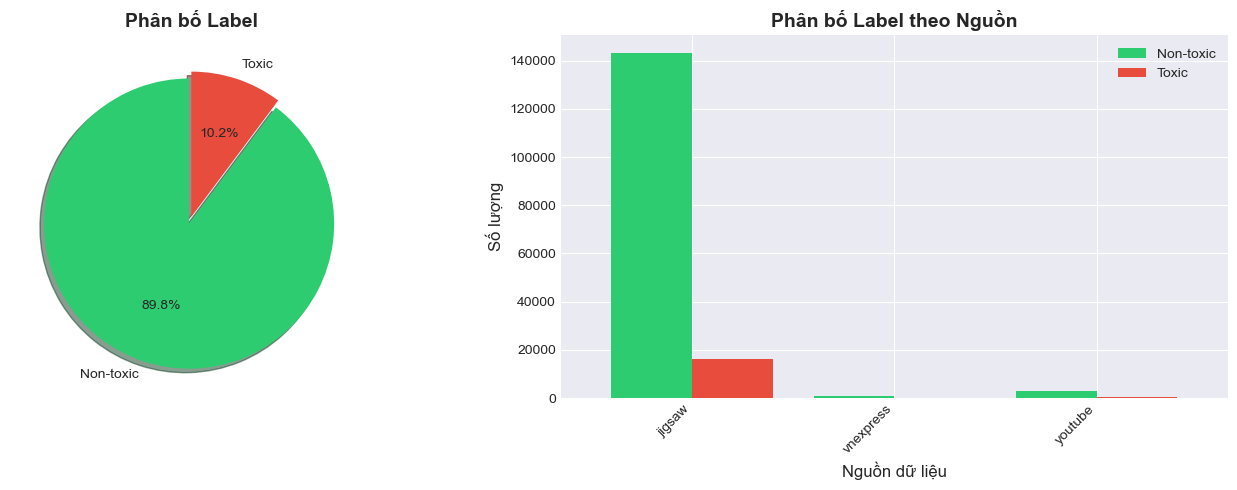

📊 Nhận xét:
- Dataset KHÔNG cân bằng
- Nguồn có nhiều toxic nhất: jigsaw


In [5]:
# Tạo figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart - Phân bố tổng thể
label_counts = df['label'].value_counts()
colors = ['#2ecc71', '#e74c3c']
explode = (0.05, 0)

axes[0].pie(label_counts, 
            labels=['Non-toxic', 'Toxic'],
            autopct='%1.1f%%',
            colors=colors,
            explode=explode,
            shadow=True,
            startangle=90)
axes[0].set_title('Phân bố Label', fontsize=14, fontweight='bold')

# Bar chart - Theo nguồn
source_label = df.groupby(['source', 'label']).size().unstack(fill_value=0)
source_label.plot(kind='bar', 
                  ax=axes[1], 
                  color=colors,
                  width=0.8)
axes[1].set_title('Phân bố Label theo Nguồn', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Nguồn dữ liệu', fontsize=12)
axes[1].set_ylabel('Số lượng', fontsize=12)
axes[1].legend(['Non-toxic', 'Toxic'], loc='upper right')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("📊 Nhận xét:")
print(f"- Dataset {'cân bằng' if abs(label_counts[0] - label_counts[1]) / len(df) < 0.2 else 'KHÔNG cân bằng'}")
print(f"- Nguồn có nhiều toxic nhất: {df[df['label']==1]['source'].value_counts().index[0]}")

PHÂN TÍCH THEO ĐỘ DÀI

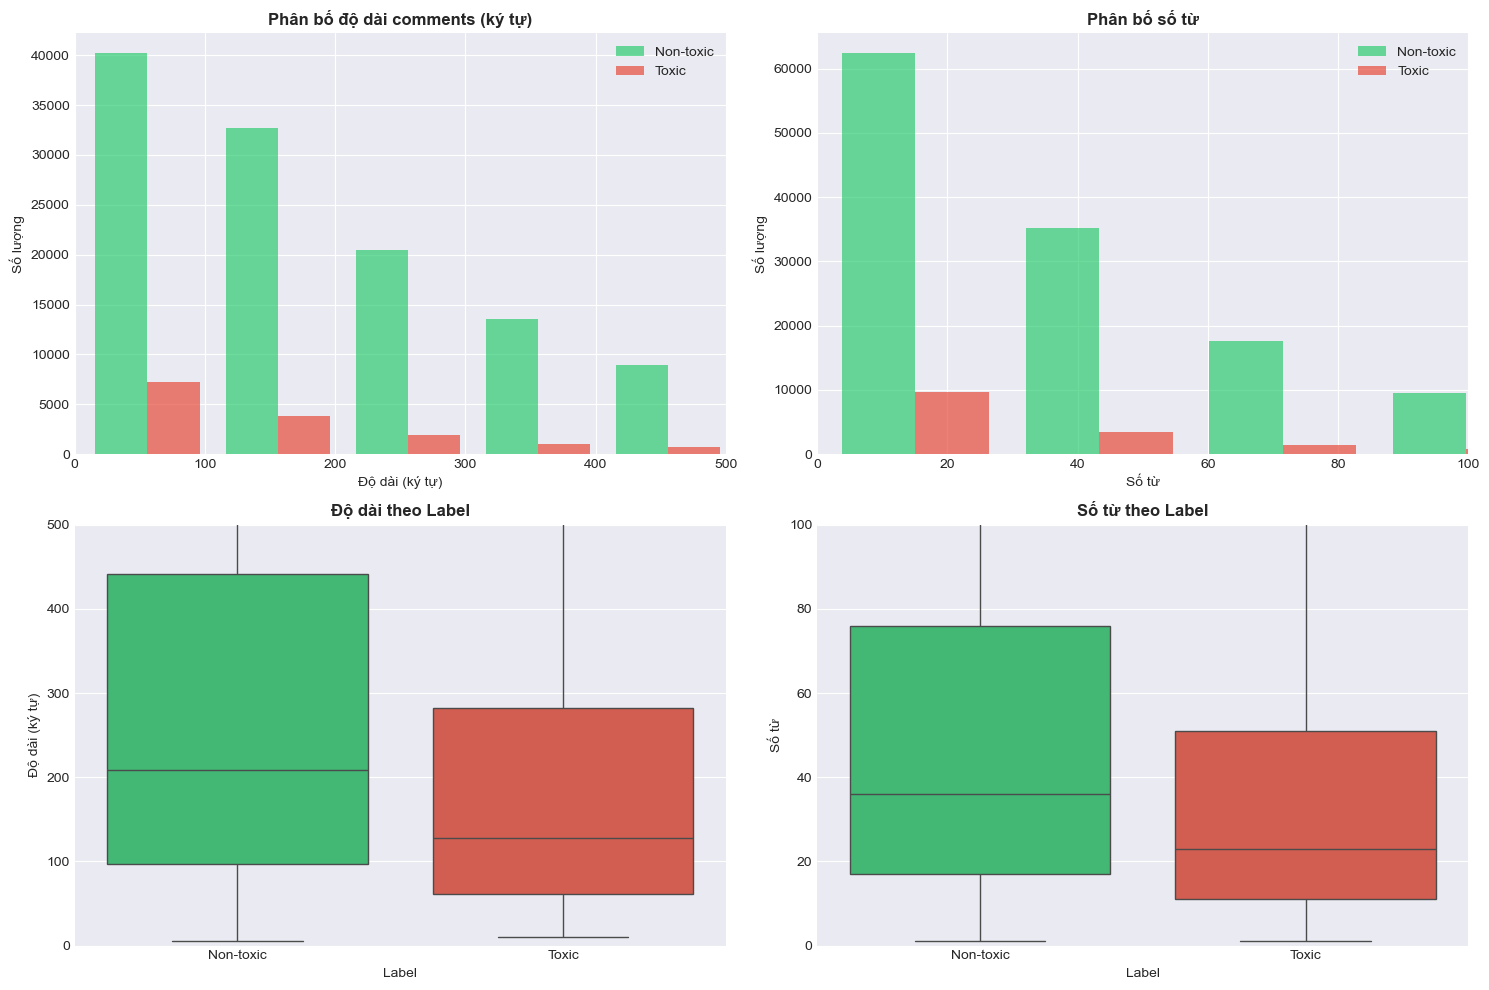


📊 Thống kê độ dài:

Non-toxic:
  - Trung bình: 395.7 ký tự
  - Trung vị: 209.0 ký tự
  - Số từ TB: 67.6 từ

Toxic:
  - Trung bình: 300.1 ký tự
  - Trung vị: 128.0 ký tự
  - Số từ TB: 52.5 từ


In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram - Độ dài ký tự
axes[0, 0].hist([df[df['label']==0]['text_length'], 
                 df[df['label']==1]['text_length']], 
                bins=50, 
                label=['Non-toxic', 'Toxic'],
                alpha=0.7,
                color=['#2ecc71', '#e74c3c'])
axes[0, 0].set_xlabel('Độ dài (ký tự)')
axes[0, 0].set_ylabel('Số lượng')
axes[0, 0].set_title('Phân bố độ dài comments (ký tự)', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, 500)

# Histogram - Số từ
axes[0, 1].hist([df[df['label']==0]['word_count'], 
                 df[df['label']==1]['word_count']], 
                bins=50,
                label=['Non-toxic', 'Toxic'],
                alpha=0.7,
                color=['#2ecc71', '#e74c3c'])
axes[0, 1].set_xlabel('Số từ')
axes[0, 1].set_ylabel('Số lượng')
axes[0, 1].set_title('Phân bố số từ', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].set_xlim(0, 100)

# Boxplot - Độ dài theo label
sns.boxplot(data=df, x='label', y='text_length', ax=axes[1, 0], palette=colors)
axes[1, 0].set_xlabel('Label')
axes[1, 0].set_ylabel('Độ dài (ký tự)')
axes[1, 0].set_title('Độ dài theo Label', fontweight='bold')
axes[1, 0].set_xticklabels(['Non-toxic', 'Toxic'])
axes[1, 0].set_ylim(0, 500)

# Boxplot - Số từ theo label
sns.boxplot(data=df, x='label', y='word_count', ax=axes[1, 1], palette=colors)
axes[1, 1].set_xlabel('Label')
axes[1, 1].set_ylabel('Số từ')
axes[1, 1].set_title('Số từ theo Label', fontweight='bold')
axes[1, 1].set_xticklabels(['Non-toxic', 'Toxic'])
axes[1, 1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

# Thống kê
print("\n📊 Thống kê độ dài:")
print("\nNon-toxic:")
print(f"  - Trung bình: {df[df['label']==0]['text_length'].mean():.1f} ký tự")
print(f"  - Trung vị: {df[df['label']==0]['text_length'].median():.1f} ký tự")
print(f"  - Số từ TB: {df[df['label']==0]['word_count'].mean():.1f} từ")

print("\nToxic:")
print(f"  - Trung bình: {df[df['label']==1]['text_length'].mean():.1f} ký tự")
print(f"  - Trung vị: {df[df['label']==1]['text_length'].median():.1f} ký tự")
print(f"  - Số từ TB: {df[df['label']==1]['word_count'].mean():.1f} từ")

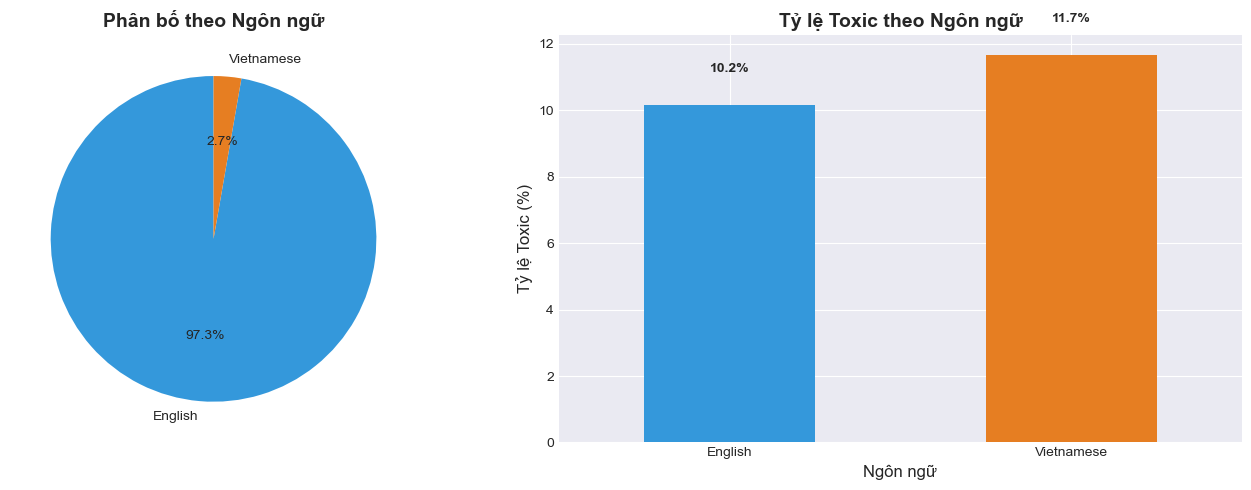


📊 Phân tích:
EN: 159,566 comments, 16,223 toxic (10.17%)
VI: 4,496 comments, 525 toxic (11.68%)


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Phân bố ngôn ngữ
language_counts = df['language'].value_counts()
axes[0].pie(language_counts, 
            labels=['English', 'Vietnamese'],
            autopct='%1.1f%%',
            colors=['#3498db', '#e67e22'],
            startangle=90)
axes[0].set_title('Phân bố theo Ngôn ngữ', fontsize=14, fontweight='bold')

# Toxic rate theo ngôn ngữ
lang_toxic_rate = df.groupby('language')['label'].mean() * 100
lang_toxic_rate.plot(kind='bar', ax=axes[1], color=['#3498db', '#e67e22'])
axes[1].set_xlabel('Ngôn ngữ', fontsize=12)
axes[1].set_ylabel('Tỷ lệ Toxic (%)', fontsize=12)
axes[1].set_title('Tỷ lệ Toxic theo Ngôn ngữ', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(['English', 'Vietnamese'], rotation=0)

# Thêm giá trị lên cột
for i, v in enumerate(lang_toxic_rate):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Phân tích:")
for lang in df['language'].unique():
    total = (df['language']==lang).sum()
    toxic = ((df['language']==lang) & (df['label']==1)).sum()
    rate = toxic / total * 100
    print(f"{lang.upper()}: {total:,} comments, {toxic:,} toxic ({rate:.2f}%)")

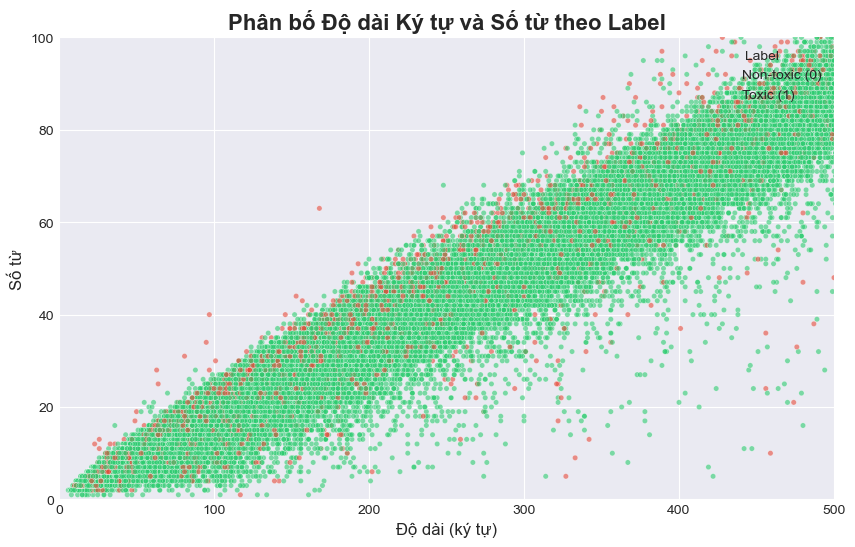

In [8]:

colors = {0: '#2ecc71', 1: '#e74c3c'} # 0: Non-toxic (Xanh), 1: Toxic (Đỏ)

# Khởi tạo biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ phân tán
sns.scatterplot(data=df,
                x='text_length',
                y='word_count',
                hue='label',
                palette=colors,
                s=15,       # Kích thước điểm
                alpha=0.6)  # Độ trong suốt

# Đặt tiêu đề và nhãn trục
plt.title('Phân bố Độ dài Ký tự và Số từ theo Label', fontsize=16, fontweight='bold')
plt.xlabel('Độ dài (ký tự)', fontsize=12)
plt.ylabel('Số từ', fontsize=12)

# Thiết lập giới hạn trục để tập trung vào phần lớn dữ liệu (tối đa 500 ký tự / 100 từ)
plt.xlim(0, 500)
plt.ylim(0, 100)

# Thêm chú giải
plt.legend(title='Label', labels=['Non-toxic (0)', 'Toxic (1)'], loc='upper right')

# Hiển thị biểu đồ
plt.show()

PHÂN TÍCH PHÂN BỐ DỮ LIỆU

1. PHÂN BỐ THEO NGÔN NGỮ:
language
en    159566
vi      4496
Name: count, dtype: int64

Tỷ lệ:
language
en    97.259573
vi     2.740427
Name: count, dtype: float64

2. PHÂN BỐ THEO LABEL:
Non-toxic (0): 147314 (89.79%)
Toxic (1): 16748 (10.21%)

3. CROSS-TABULATION (Ngôn ngữ x Label):
label          0      1   Total
language                       
en        143343  16223  159566
vi          3971    525    4496
Total     147314  16748  164062

4. TỶ LỆ TOXIC THEO NGÔN NGỮ:
en: 10.17% toxic (16223/159566)
vi: 11.68% toxic (525/4496)


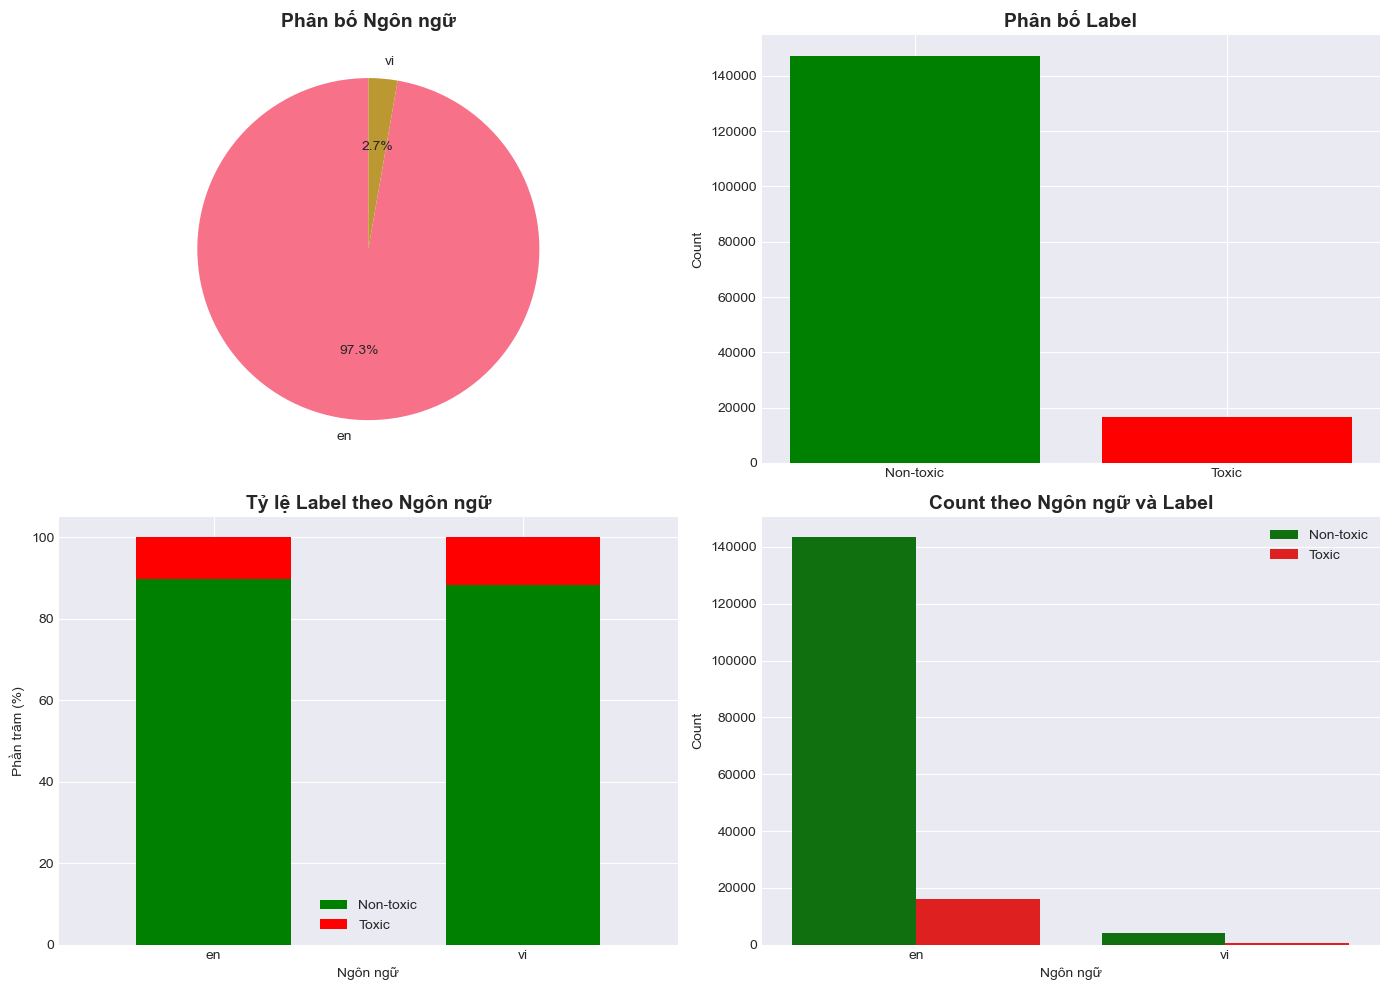


✅ Đã lưu biểu đồ: language_distribution_analysis.png


In [9]:
# Cell 1: PHÂN TÍCH PHÂN BỐ NGÔN NGỮ VÀ LABEL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dữ liệu đã cleaned
df = pd.read_csv('../data/cleaned_dataset.csv')

print("="*60)
print("PHÂN TÍCH PHÂN BỐ DỮ LIỆU")
print("="*60)

# 1. Phân bố theo ngôn ngữ
print("\n1. PHÂN BỐ THEO NGÔN NGỮ:")
lang_dist = df['language'].value_counts()
print(lang_dist)
print(f"\nTỷ lệ:")
print(lang_dist / len(df) * 100)

# 2. Phân bố theo label
print("\n2. PHÂN BỐ THEO LABEL:")
label_dist = df['label'].value_counts()
print(f"Non-toxic (0): {label_dist[0]} ({label_dist[0]/len(df)*100:.2f}%)")
print(f"Toxic (1): {label_dist[1]} ({label_dist[1]/len(df)*100:.2f}%)")

# 3. QUAN TRỌNG: Cross-tabulation (Ngôn ngữ x Label)
print("\n3. CROSS-TABULATION (Ngôn ngữ x Label):")
cross_tab = pd.crosstab(
    df['language'], 
    df['label'], 
    margins=True,
    margins_name='Total'
)
print(cross_tab)

print("\n4. TỶ LỆ TOXIC THEO NGÔN NGỮ:")
for lang in df['language'].unique():
    lang_data = df[df['language'] == lang]
    toxic_rate = (lang_data['label'] == 1).mean() * 100
    print(f"{lang}: {toxic_rate:.2f}% toxic ({(lang_data['label'] == 1).sum()}/{len(lang_data)})")

# 5. Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Phân bố ngôn ngữ
axes[0, 0].pie(lang_dist, labels=lang_dist.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Phân bố Ngôn ngữ', fontsize=14, fontweight='bold')

# Plot 2: Phân bố label
axes[0, 1].bar(['Non-toxic', 'Toxic'], [label_dist[0], label_dist[1]], color=['green', 'red'])
axes[0, 1].set_title('Phân bố Label', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Count')

# Plot 3: Stacked bar (Ngôn ngữ x Label)
cross_tab_pct = pd.crosstab(df['language'], df['label'], normalize='index') * 100
cross_tab_pct.plot(kind='bar', stacked=True, ax=axes[1, 0], color=['green', 'red'])
axes[1, 0].set_title('Tỷ lệ Label theo Ngôn ngữ', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Ngôn ngữ')
axes[1, 0].set_ylabel('Phần trăm (%)')
axes[1, 0].legend(['Non-toxic', 'Toxic'])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Plot 4: Count plot (Ngôn ngữ x Label)
sns.countplot(data=df, x='language', hue='label', ax=axes[1, 1], palette=['green', 'red'])
axes[1, 1].set_title('Count theo Ngôn ngữ và Label', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Ngôn ngữ')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(['Non-toxic', 'Toxic'])

plt.tight_layout()
plt.savefig('language_distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Đã lưu biểu đồ: language_distribution_analysis.png")